In [19]:
import numpy as np
from getdist import plots
from getdist.gaussian_mixtures import GaussianND, MixtureND
import pickle

In [14]:
with open('../output/cpl_gaussian_mixture_0.pickle', 'rb') as handle:
    cpl_mix = pickle.load(handle)

In [17]:
param_names = ['Omega_m', 'w0', 'wa']
labels = ['\Omega_m', 'w_0', 'w_a']
ms = cpl_mix['locs']
cs = cpl_mix['scale_tril']
ws = cpl_mix['weights']
N_gauss = len(ws)
separate_normals = []
for mean, cov in zip(ms, cs):
    separate_normals.append(GaussianND(mean, cov, is_inv_cov=False, names=param_names, labels=labels))
mixture = MixtureND(np.array(ms), np.array(cs), weights=np.array(ws), names=param_names, labels=labels)
separate_normals.append(mixture)
separate_labels = [f'weight: {w:.4}' for w in ws]
separate_labels.append('Weighted sum')
separate_normals.reverse() # reverse to make the mixture plot in the back
separate_labels.reverse()

# Gaussian mixture guide

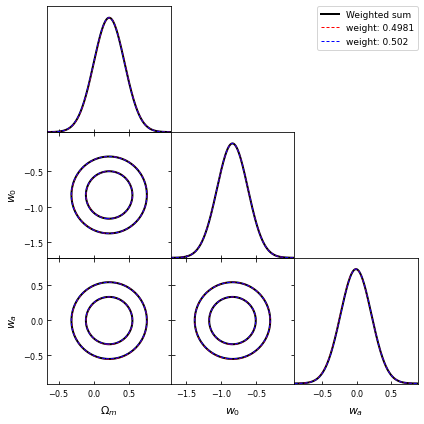

In [21]:
g = plots.get_subplot_plotter()
g.triangle_plot(separate_normals, legend_labels=separate_labels, contour_lws=[2.0, *[1.0 for N in range(N_gauss)]], contour_ls=['-', *['--' for N in range(N_gauss)]])